<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Feature Scaling

Continuando con nuestro proyecto en AutoRenew, la empresa de coches de segunda mano, en este laboratorio abordarás una fase crucial del preprocesamiento de datos: el **Feature Scaling**. Este paso es esencial para asegurar que todas las características (variables) de los coches se encuentren en la misma escala antes de entrenar los modelos de Machine Learning. Esto evitará que algunas características dominen sobre otras debido a sus rangos de valores diferentes, mejorando así la precisión del modelo predictivo que estás desarrollando.

Tu tarea en este laboratorio es aplicar técnicas de Feature Scaling a las características del conjunto de datos que consideres relevantes. Este paso es fundamental para preparar los datos de manera adecuada para el entrenamiento de modelos de Machine Learning, lo que haremos en los próximos ejercicios.

**Columnas del conjunto de datos que podrías escalar:**

- **price**: Precio del coche.

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **kilometer**: Kilometraje total del coche.

- **yearOfRegistration**: Año de registro del coche (aunque es una característica temporal, en algunos casos puede necesitar escalado dependiendo del enfoque del modelo).

- **monthOfRegistration**: Mes de registro del coche.

**Instrucciones:**

1. **Identificación de las características a escalar:** Revisa el conjunto de datos y selecciona las columnas que deberían ser escaladas. Estas generalmente incluyen características numéricas continuas como el precio, la potencia y el kilometraje.

2. **Aplicación de técnicas de Feature Scaling**


3. **Comparación de resultados:** Después de aplicar el escalado, observa cómo han cambiado las distribuciones de las características. Evalúa cuál de las técnicas de escalado es más apropiada para este conjunto de datos y justifica tu elección.

**Nota:** Este laboratorio se construye sobre el análisis exploratorio y la gestión de nulos que realizaste anteriormente. Asegúrate de mantener una buena documentación de tus procesos, ya que utilizaremos estos datos escalados en las próximas etapas de modelado de Machine Learning.


In [30]:
import pandas as pd
import numpy as np
import math

# Librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("datos/iterative.csv", index_col = 0)

In [28]:
df.head(1)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,2016-03,A5_Sportback_2.7_Tdi,private,offer,18300.0,test,coupe,Moderno,manually,187.0,Sin informacion,125000.0,5.0,diesel,audi,yes,2016-03,2016-04


In [27]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
lastSeen               0
dtype: int64

In [ ]:
escalador_robust = RobustScaler()
escalador_standard = StandardScaler()
escalador_min_max = MinMaxScaler()

In [ ]:
datos_transf_robust = escalador_robust.fit_transform(df[["kilometer", "powerCV"]])
df[["kilometer_robust", "powerCV_robust"]] = datos_transf_robust

In [ ]:
datos_transf_standard = escalador_standard.fit_transform(df[["kilometer", "powerCV"]])
df[["kilometer_standard", "powerCV_standard"]] = datos_transf_standard

In [ ]:
datos_transf_min_max = escalador_min_max.fit_transform(df[["kilometer", "powerCV"]])
df[["kilometer_MinMax", "powerCV_MinMax"]] = datos_transf_min_max

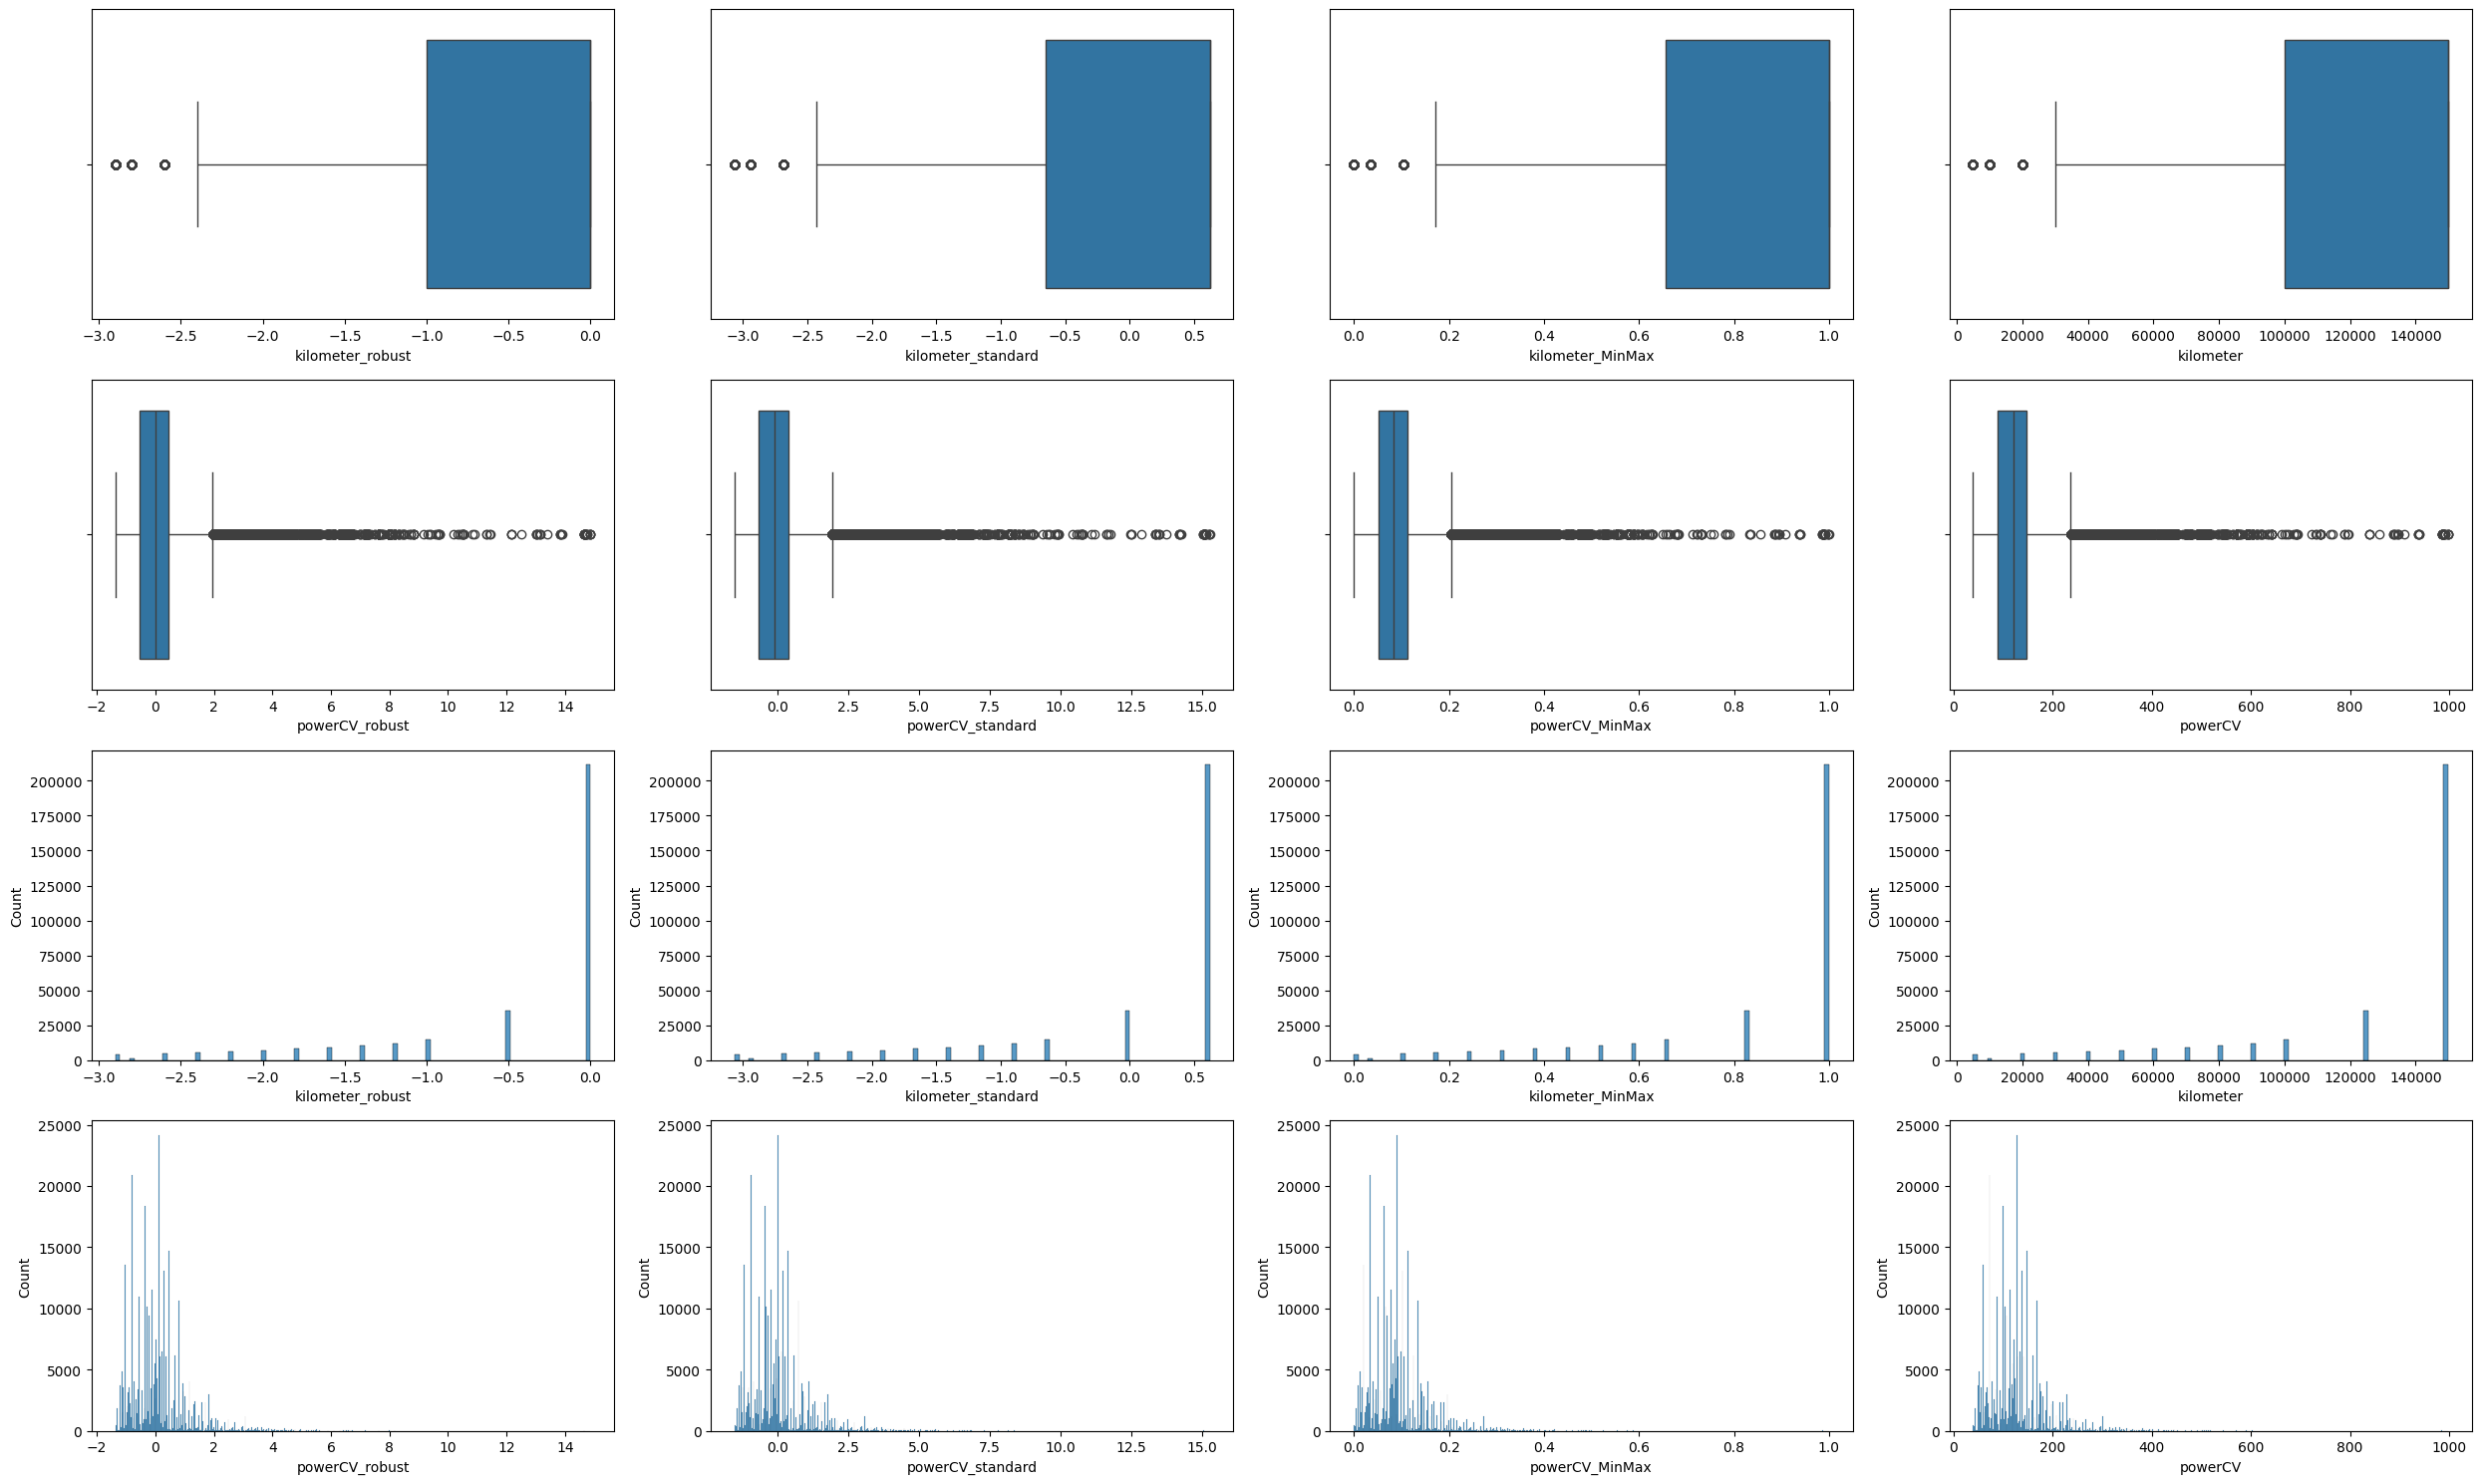

In [35]:
fig , axes = plt.subplots(nrows=4 , ncols=4, figsize = (25, 15))
sns.boxplot(x = "kilometer_robust", data = df, ax = axes[0][0])
sns.boxplot(x = "kilometer_standard", data = df, ax = axes[0][1])
sns.boxplot(x = "kilometer_MinMax", data = df, ax = axes[0][2])
sns.boxplot(x = "kilometer", data = df, ax = axes[0][3])

sns.boxplot(x = "powerCV_robust", data = df, ax = axes[1][0])
sns.boxplot(x = "powerCV_standard", data = df, ax = axes[1][1])
sns.boxplot(x = "powerCV_MinMax", data = df, ax = axes[1][2])
sns.boxplot(x = "powerCV", data = df, ax = axes[1][3])

sns.histplot(x = "kilometer_robust", data = df, ax = axes[2][0])
sns.histplot(x = "kilometer_standard", data = df, ax = axes[2][1])
sns.histplot(x = "kilometer_MinMax", data = df, ax = axes[2][2])
sns.histplot(x = "kilometer", data = df, ax = axes[2][3])

sns.histplot(x = "powerCV_robust", data = df, ax = axes[3][0])
sns.histplot(x = "powerCV_standard", data = df, ax = axes[3][1])
sns.histplot(x = "powerCV_MinMax", data = df, ax = axes[3][2])
sns.histplot(x = "powerCV", data = df, ax = axes[3][3])

plt.tight_layout()

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,330616.0,5.972945e+03,6770.233746,500.000000,1500.000000,3499.000000,7800.000000,50000.000000
powerCV,330616.0,1.263323e+02,57.057565,40.000000,89.000000,120.604559,148.000000,998.000000
kilometer,330616.0,1.255696e+05,39345.832791,5000.000000,100000.000000,150000.000000,150000.000000,150000.000000
monthOfRegistration,330616.0,6.143650e+00,3.339515,1.000000,3.000000,6.000000,9.000000,12.000000
kilometer_robust,330616.0,-4.886079e-01,0.786917,-2.900000,-1.000000,0.000000,0.000000,0.000000
powerCV_robust,330616.0,9.708002e-02,0.967077,-1.366179,-0.535670,0.000000,0.464330,14.871109
kilometer_standard,330616.0,7.734784e-17,1.000002,-3.064360,-0.649869,0.620915,0.620915,0.620915
powerCV_standard,330616.0,1.292927e-16,1.000002,-1.513076,-0.654293,-0.100385,0.379752,15.277011
kilometer_MinMax,330616.0,8.315145e-01,0.271351,0.000000,0.655172,1.000000,1.000000,1.000000
powerCV_MinMax,330616.0,9.011720e-02,0.059559,0.000000,0.051148,0.084138,0.112735,1.000000


Kilómetros:



1. Kilometer Feature:

	•	Original Data: The kilometer feature has a skewed distribution, with values ranging widely and some visible outliers.
	•	Min-Max Scaling (kilometer_MinMax): This scaling method transforms values to a [0, 1] range. In this plot, the majority of values are compressed toward the right, with fewer values on the left. Min-Max scaling retains the original distribution shape, so the skew remains.
	•	Standard Scaling (kilometer_standard): This centers the data around a mean of 0 with a standard deviation of 1. However, due to the skew in the original data, the transformed values are still right-skewed, and some values fall outside the typical [-1, 1] range.
	•	Robust Scaling (kilometer_robust): This method is less affected by outliers, using the median and interquartile range (IQR) for scaling. The result is similar to the standard scaling but with a smaller impact from outliers, leading to more compressed values within the range of about [-3, 0].

2. PowerCV Feature:

	•	Original Data: The powerCV feature has extreme outliers, with a few very large values, creating a highly skewed distribution. Most values are crowded near the lower end.
	•	Min-Max Scaling (powerCV_MinMax): This transformation scales values to a [0, 1] range, preserving the original distribution. The large outliers remain significant in the Min-Max scaled data, as seen by the strong clustering near 0.
	•	Standard Scaling (powerCV_standard): By centering around 0 and scaling to unit variance, this transformation compresses the values closer to 0 but doesn’t handle the outliers well. The outliers still cause the majority of data points to crowd near the lower end.
	•	Robust Scaling (powerCV_robust): This approach is less affected by outliers, focusing on the median and IQR. The result is a more even spread of values within a tighter range, effectively reducing the impact of the extreme outliers seen in powerCV.

Key Observations:

- Effectiveness with Outliers: Robust Scaling is generally the best choice when dealing with outliers, as seen with both kilometer_robust and powerCV_robust. It compresses the range more effectively, making data more manageable for models sensitive to outliers.
- Distribution Shape: Min-Max Scaling retains the original distribution shape, making it suitable when data is expected to be within a specific range and the model doesn’t rely heavily on normality (e.g., neural networks). However, it’s sensitive to outliers, which compresses the majority of values near 0 in both kilometer_MinMax and powerCV_MinMax.
- Centering and Scaling: Standard Scaling centers the data and gives a unit standard deviation, which is effective when data is approximately normally distributed. However, it doesn’t handle skewed distributions or outliers well, as seen with powerCV_standard.

Recommendation:

- If the model is sensitive to outliers (like linear regression or k-means), use Robust Scaling.
- If data needs to be in a specific range (e.g., neural networks), use Min-Max Scaling, but only if outliers are not significant.
- If data is roughly normally distributed and outliers are minimal, use Standard Scaling for centering around 0 and unit variance.

In summary, Robust Scaling generally provides the most stable and balanced transformations in this comparison, especially given the outliers in both kilometer and powerCV.